# Code Implementation using R
***
set your working directory according to your file path and read the data

In [6]:
setwd("/Users/karthicharish/Desktop/hello-data-science/Linear Regression")
library(ggplot2)

In [7]:
wine <- read.csv("wine.csv", 
                  sep = ',', 
                  header = T,
                  strip.white = TRUE,
                  stringsAsFactors = FALSE,
                  na.strings = c('NA', '?', ''))

In [8]:
str(wine)

'data.frame':	38 obs. of  6 variables:
 $ VINT   : int  1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 ...
 $ LPRICE : num  -0.999 -0.454 NA -0.808 NA ...
 $ WRAIN  : int  600 690 430 502 440 420 582 485 763 830 ...
 $ DEGREES: num  17.1 16.7 15.4 17.1 15.7 ...
 $ HRAIN  : int  160 80 180 130 140 110 187 187 290 38 ...
 $ TIME_SV: int  31 30 29 28 27 26 25 24 23 22 ...


In [9]:
sapply(wine, function(x) sum(is.na(x)))

VINT  LPRICE   WRAIN DEGREES   HRAIN TIME_SV 
      0      11       0       0       0       0

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


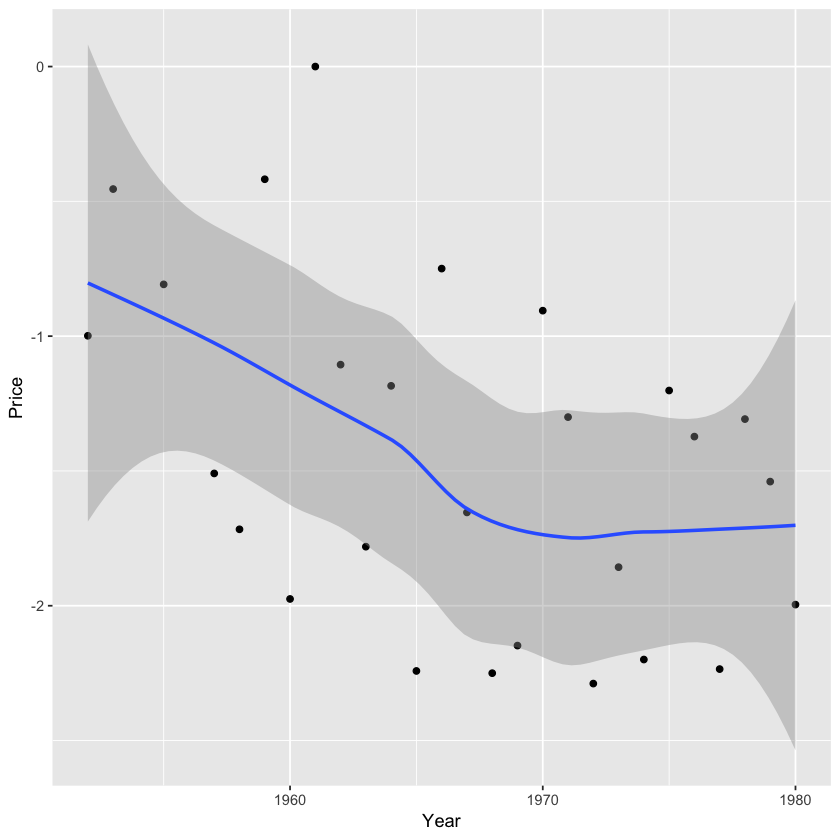

In [10]:
time <- ggplot(wine[!is.na(wine$LPRICE),], aes(x=VINT, y=LPRICE))
time + geom_point() + geom_smooth() + xlab("Year") + ylab("Price")

## Let's build a linear model using all the variables
***

In [12]:
winetrain <- subset(wine, !is.na(wine$LPRICE))
lmod <- lm(LPRICE ~ WRAIN + VINT + HRAIN + DEGREES, winetrain)
summary(lmod)


Call:
lm(formula = LPRICE ~ WRAIN + VINT + HRAIN + DEGREES, data = winetrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46027 -0.23864  0.01347  0.18600  0.53446 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.1440862 14.6940550   2.392  0.02575 *  
WRAIN        0.0011668  0.0004820   2.421  0.02420 *  
VINT        -0.0238474  0.0071667  -3.328  0.00306 ** 
HRAIN       -0.0038606  0.0008075  -4.781 8.97e-05 ***
DEGREES      0.6163924  0.0951755   6.476 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2865 on 22 degrees of freedom
Multiple R-squared:  0.8275,	Adjusted R-squared:  0.7962 
F-statistic: 26.39 on 4 and 22 DF,  p-value: 4.058e-08


## Prediction
***

In [18]:
winetest <- wine[is.na(wine$LPRICE),]
wineprediction <- predict(lmod, newdata=winetest)
wineprediction

3          5         30         31         32         33         34 
-2.1647920 -1.8820050 -1.4437860 -1.1909184 -0.9038737 -1.7685432 -1.1162504 
        35         36         37         38 
-2.1832290 -1.6889235 -1.0092725 -0.6848387

However we have no way to validate our prediction since we the actual test data doesnt have values for LPRICE.